# Import Content

In [166]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sl

%matplotlib inline

url1 ='https://raw.githubusercontent.com/kozousps/repo/main/academy_awards.csv'

Create SQLite Connection

In [167]:
import sqlite3
conn = sqlite3.connect('finals.db')
cursor = conn.cursor()

Format tables

In [168]:
df1 = pd.read_csv(url1)
df1['Year'] =df1['Year'].str[:4].astype(int)
df1['Winner'] = df1["Won?"].map({'YES': True, 'NO': False}).astype('bool')
df1 = df1.loc[df1['Category'] == 'Best Picture']
df1 = df1[["Year", "Category", "Nominee", "Winner"]]

df2 = pd.read_csv(url1)
df2['Year'] =df2['Year'].str[:4].astype(int)
df2['Winner'] = df2["Won?"].map({'YES': True, 'NO': False}).astype('bool')
df2 = df2.loc[df2['Category'] == 'Film Editing']
df2 = df2[["Year", "Category", "Nominee", "Winner"]]


Save tables in sqlite

In [169]:
cursor.execute('''DROP TABLE IF EXISTS best_picture''')
cursor.execute('''DROP TABLE IF EXISTS film_editing''')

df1.to_sql('best_picture', conn)
df2.to_sql('film_editing', conn)

All time movies winning Best Picture and nominated for Film Editing

In [177]:
edit_nom34 = pd.read_sql("""SELECT fe.Year, fe.Category, fe.Nominee, fe.Winner AS FEWinner, bp.Winner AS BPWinner
                        FROM film_editing fe
                        INNER JOIN best_picture bp ON fe.Nominee = bp.Nominee
                        WHERE bp.Winner = 1
                        AND fe.Year >= '1934'
                        """, conn)
edit_nom34

,Year,Category,Nominee,FEWinner,BPWinner
0,2010,Film Editing,The King's Speech,0,1
1,2009,Film Editing,The Hurt Locker,1,1
2,2008,Film Editing,Slumdog Millionaire,1,1
3,2007,Film Editing,No Country for Old Men,0,1
4,2006,Film Editing,The Departed,1,1
...,...,...,...,...,...
64,1939,Film Editing,Gone with the Wind,1,1
65,1938,Film Editing,You Can't Take It with You,0,1
66,1936,Film Editing,The Great Ziegfeld,0,1
67,1935,Film Editing,Mutiny on the Bounty,0,1


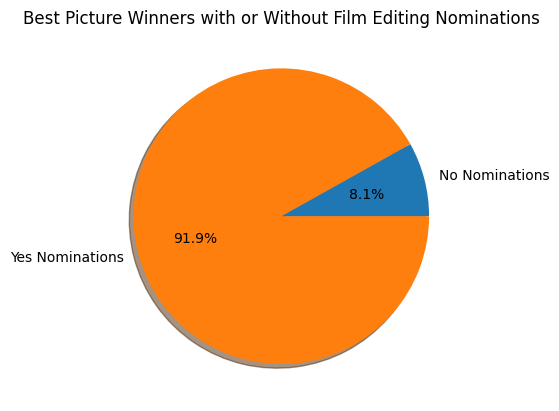

In [176]:
a = [76-len(edit_nom34)-1,len(edit_nom34)-1]
labels = ['No Nominations', 'Yes Nominations']
plt.pie(a, labels = labels, autopct='%1.1f%%', shadow=True)
plt.title('Best Picture Winners with or Without Film Editing Nominations')
plt.show()

All films since 1981 that have won Best Picture and nominated for Film Editing

In [172]:
edit_nom = pd.read_sql("""SELECT fe.Year, fe.Category, fe.Nominee, fe.Winner AS FEWinner, bp.Winner AS BPWinner
                        FROM film_editing fe
                        INNER JOIN best_picture bp ON fe.Nominee = bp.Nominee
                        WHERE bp.Winner = 1
                        AND fe.Year >= '1981'
                        """, conn)
edit_nom

,Year,Category,Nominee,FEWinner,BPWinner
0,2010,Film Editing,The King's Speech,0,1
1,2009,Film Editing,The Hurt Locker,1,1
2,2008,Film Editing,Slumdog Millionaire,1,1
3,2007,Film Editing,No Country for Old Men,0,1
4,2006,Film Editing,The Departed,1,1
5,2005,Film Editing,Crash,1,1
6,2004,Film Editing,Million Dollar Baby,0,1
7,2003,Film Editing,The Lord of the Rings: The Return of the King,1,1
8,2002,Film Editing,Chicago,1,1
9,2001,Film Editing,A Beautiful Mind,0,1


Films that have won both categories

In [173]:
both = pd.read_sql("""SELECT fe.Year, fe.Category, fe.Nominee, fe.Winner
                        FROM film_editing fe
                        INNER JOIN best_picture bp ON fe.Nominee = bp.Nominee
                        WHERE bp.Winner = 1
                        AND fe.Winner = 1
                        """, conn)
both

,Year,Category,Nominee,Winner
0,2009,Film Editing,The Hurt Locker,1
1,2008,Film Editing,Slumdog Millionaire,1
2,2006,Film Editing,The Departed,1
3,2005,Film Editing,Crash,1
4,2003,Film Editing,The Lord of the Rings: The Return of the King,1
5,2002,Film Editing,Chicago,1
6,1997,Film Editing,Titanic,1
7,1996,Film Editing,The English Patient,1
8,1994,Film Editing,Forrest Gump,1
9,1993,Film Editing,Schindler's List,1
